In [ ]:
%matplotlib inline
from IPython.display import HTML

import matplotlib.pyplot as plt
import numpy as np
import scipy
plt.rcParams["figure.figsize"] = (10,4)
colors = ['r','g','b']

# Lorenz curves in theory
## Distributions and densities

Define the cumulative distribution function of income as $F(y)$ so that the proportion of the population having income less than or equal to $x$ is $F(x)$. Then the probability density function $f(y) = d/dy\ F(y)$.

We can take, as an example, the lognormal distribution, which is commonly used to model income distribution. A lognormal random variable is one whose natural logarithm has a normal distribution, hence its pdf and cdf are

$$
f(y) = \frac{1}{\sqrt{2\sigma^2}} \exp \left[ \frac{(\ln y - \mu)^2}{2\sigma^2} \right]
\qquad 
F(y) = \frac{1}{\sqrt{2\sigma^2}} \int_{-\infty}^{y} \exp \left[ \frac{(\ln t - \mu)^2}{2\sigma^2} \right] \, dt
$$

Here's what these two functions look like, with a variety of values of $\sigma$ and $\mu$ chosen so that the mean of the distribution is the same in all cases (2.0):

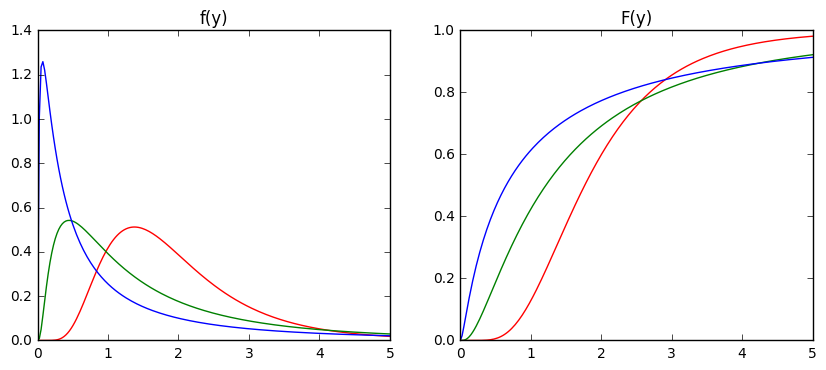

In [7]:
##########################################
plt.rcParams["figure.figsize"] = (10,4)
fig, ax = plt.subplots(1, 2)
##########################################

from scipy.stats import lognorm

x = np.linspace(0, 5, 200)

# mean is e^{mu + sigma^2/2}
mean = 2
dists = [
    lognorm(0.5, 0, np.exp(np.log(mean) - 0.5**2/2)), # sigma = 0.5, mean = 2
    lognorm(1.0, 0, np.exp(np.log(mean) - 1.0**2/2)), # sigma = 1.0, mean = 2
    lognorm(1.5, 0, np.exp(np.log(mean) - 1.5**2/2))  # sigma = 1.5, mean = 2
]

for dist, color in zip(dists, colors):
    ax[0].plot(x, dist.pdf(x),color)
    ax[1].plot(x, dist.cdf(x),color)
    
ax[0].set_title("f(y)")
ax[1].set_title("F(y)");


## Lorenz curves

A Lorenz curve is another way to describe a probability distribution. For each $p$, $L(p)$ is the fraction of total income earned by the poorest $p$ fraction of the population. More formally

$$L(p) = \frac{\int_{0}^{p} Q(z)\,dz}{\int_{0}^{1} Q(z)\,dz} = \frac{\int_{0}^{Q(p)} y f(y)\,dy}{\mathsf{E}(y)}$$

where we define the (generalized) inverse c.d.f.

$$Q(z) = F^{-1}(z) = \mathrm{inf} \{ x: F(x) \geq z \}$$,

and note that $\int_{0}^{p} Q(z)\,dz = \int_{0}^{Q(p)} y f(y)\,dy.$ This is the partial mean up to $Q(p)$, which equals the mean income, $\mathsf{E}(y)$, when $p = 1$.

Since $L(p)$ is a constant times the integral of an increasing function $Q(\cdot)$, it is increasing and convex.

The Lorenz curves for the lognormal distributions shown above look like this:

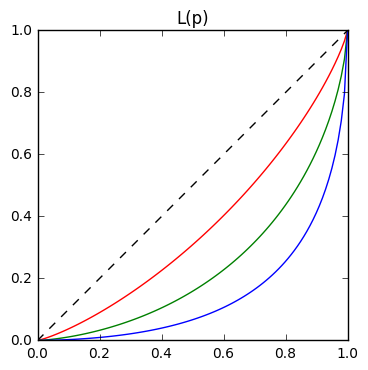

In [6]:
##########################################
plt.rcParams["figure.figsize"] = (4,4)
##########################################

from scipy.integrate import quad

x = np.linspace(0, 1, 100)

def make_lorenz(dist):
    return np.vectorize(lambda p:
        quad(lambda y: y * dist.pdf(y), a = 0, b = dist.ppf(p))[0] / dist.stats()[0]
    )
    
for dist, color in zip(dists,colors):
    plt.plot(x, make_lorenz(dist)(x),color)

# Plot the 45 degree line (total equality)
plt.ylim(0,1)
plt.plot(x,x,"k--")

plt.title("L(p)");

## Deriving the c.d.f from the Lorenz curve

It follows that given $L(p)$ we can derive the quantile function (inverse c.d.f) as

$$Q(p) = \mathsf{E}(y) \cdot L'(p)$$

where $L'(p) = \frac{d}{dp} L(p)$.

Since the support of a distribution is given by $[Q(0), Q(1)]$, we can observe that the derivatives at either endpoint of the Lorenz curve dictate the minimum and maximum values of the distribution. The Lorenz curve for a distribution with support on the entire real line (minimum income 0, maximum $\to \infty$) must then have a derivative of 0 at 0 and $\infty$ in the limit as it goes to 1.

The lognormal distributions shown above have support on $[0, \infty)$. We can see that the derivatives indeed approach these values as we zoom in on the end points.

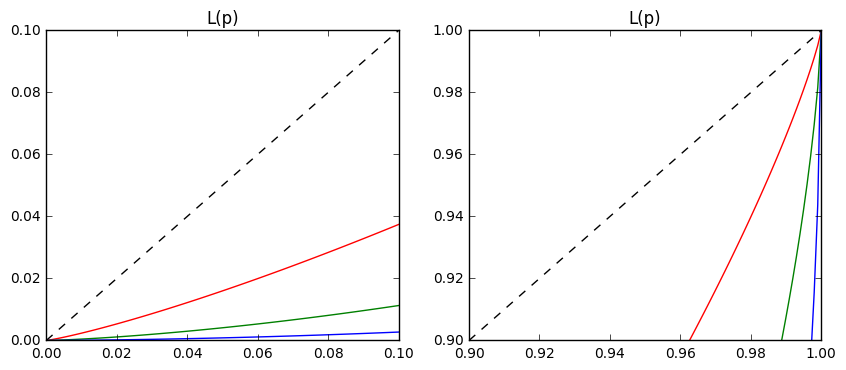

In [8]:
##########################################
plt.rcParams["figure.figsize"] = (10,4)
fig, ax = plt.subplots(1, 2)
ax[0].set_xlim((0.0, 0.1))
ax[0].set_ylim((0.0, 0.1))
ax[1].set_xlim((0.9, 1.0))
ax[1].set_ylim((0.9, 1.0))
##########################################

x0 = np.linspace(0, 0.1, 100)
x1 = np.linspace(0.9, 1.0, 100)
for dist, color in zip(dists,colors):
    lorenz = make_lorenz(dist)
    ax[0].plot(x0, lorenz(x0),color)
    ax[1].plot(x1, lorenz(x1),color)

ax[0].plot(x0,x0,"k--")
ax[1].plot(x1,x1,"k--")

ax[0].set_title("L(p)")
ax[1].set_title("L(p)");

## Inverse Lorenz curves

As a convex function, the Lorenz curve is invertible. Call the inverse $p(L)$. For a given $L$ proportion of total income, $p(L)$ is the proportion of the population (arranged least to most) that earns that proportion of the income. The we can write $p(L)$ as:

$$
p(L) = 